# Pandas

Mit Pandas (= panel data) lassen sich tabellarische Daten sehr komfortabel handhaben. Mehr unter https://pandas.pydata.org/.

Sehr hilfrich:
- https://pandas.pydata.org/docs/getting_started/intro_tutorials/index.html
- https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

Pandas nutzt zwei wichtige Datenstrukturen:
- `Series` sind 1-dimensionale Arrays. Im Gegensatz zu Numpy-Arrays haben sie aber einen zusätzlichen Index, über den man komfortabel auf Einträge zugreifen kann. Intern baut dies auf Numpy-Arrays auf.
- `DataFrame` ist eine ganze Tabelle bestehend aus mehreren Series (=Spalten) gleicher Länge.

In [133]:
import numpy as np
import pandas as pd # empfehlenswerte Konvention

#### DataFrames

In [134]:
starwars_simple = pd.DataFrame({
    "name"   : ["Luke", "Chewbacca", "Darth Vader"],
    "jedi"   : [True, False, True],
    "height" : [172, 228, 202]})
starwars_simple

,name,jedi,height
0,Luke,True,172
1,Chewbacca,False,228
2,Darth Vader,True,202


Jede Spalte ist eine Series.

In [135]:
starwars_simple["height"]
type(starwars_simple["height"])

pandas.core.series.Series

Die vorderste Spalte eines DataFrame (oder Series) ist der sogenannte Index. Er enthält sozusagen die Zeilennamen. Standardmäßig sind dies die Zahlen 0, 1, 2, ...
Man kann jedoch auch einen anderen Index setzen.

In [136]:
starwars_simple.index
starwars_simple = starwars_simple.set_index("name")
starwars_simple

,jedi,height
name,,
Luke,True,172
Chewbacca,False,228
Darth Vader,True,202


Man kann eine Series auch explizit erzeugen. Falls man keinen Index angibt, sind es wieder die Zahlen 0, 1, 2, ...

In [137]:
dummy = pd.Series(np.random.randn(4), index= ["a", "c", "d", "b"]) # spezieller Index
dummy

a   -0.086888
c    0.197479
d   -1.080886
b    1.285314
dtype: float64

#### Daten einlesen und schreiben

Pandas bietet eine Vielzahl an Möglichkeiten um Daten aus Datenbanken (via SQL) oder aus Dateien einzulesen, z.B. csv, xlsx, parquet, feather, ...

In [138]:
starwars = pd.read_csv("ressources/starwars.csv") # siehe Dokumentation, ebenso zB pd.read_excel(), pd.read_sql()
starwars

,name,height,mass,sex,eye_color,homeworld,jedi
0,Luke Skywalker,172,77.0,male,blue,Tatooine,True
1,R2-D2,96,32.0,none,red,Naboo,False
2,Darth Vader,202,136.0,male,yellow,Tatooine,True
3,Leia Organa,150,49.0,female,brown,Alderaan,True
4,Chewbacca,228,112.0,male,blue,Kashyyyk,False
5,Yoda,66,17.0,male,brown,NaN,True
6,Boba Fett,183,78.2,male,brown,Kamino,False


Ersten Einblick in die Daten gewinnen.

In [139]:
#starwars.head()
starwars.info()
#starwars.describe()
#starwars.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       7 non-null      object 
 1   height     7 non-null      int64  
 2   mass       7 non-null      float64
 3   sex        7 non-null      object 
 4   eye_color  7 non-null      object 
 5   homeworld  6 non-null      object 
 6   jedi       7 non-null      object 
dtypes: float64(1), int64(1), object(5)
memory usage: 520.0+ bytes


Auch das Lesen und Schreiben von xlsx-Dateien ist kein Problem. Hier exemplarisch den Datensatz als xlsx abspreichern. Hierfür muss das Paket *openpyxl* installiert sein.

In [140]:
# starwars.to_excel("ressources/starwars.xlsx", sheet_name="some characters", index=False)

#### Auswahl von Spalten oder Zeilen

Wählt man nicht nur einen Spaltennamen sondern eine Liste von mehreren Spalten, so erhält man einen DataFrame.

In [141]:
starwars[["name", "height"]] 

,name,height
0,Luke Skywalker,172
1,R2-D2,96
2,Darth Vader,202
3,Leia Organa,150
4,Chewbacca,228
5,Yoda,66
6,Boba Fett,183


Bei der Zeilenauswahl möchte man meistens Zeilen selektieren, die bestimmte Eigenschaften erfüllen.
Hierfür schreibt man in die eckigen Klammern `[]` einen True/False-Vektor von der Länge des DataFrames.
Oft sind Vergleichsoperatoren (`<`, `>`, `==`, `<=`, `>=`, `!=`) und Boole'sche Operatoren `&` (and), `|` (or) und `~` (not) sehr hilfreich.

In [142]:
starwars[starwars["height"] < 180]
starwars["height"] < 180 # dies ergibt einen True/False-Vektor von der Länge des DataFrames

starwars[(starwars["height"] < 180) & (starwars["sex"] == "male")] # Boole'sche Operatoren 

starwars[starwars["eye_color"].isin(["red", "blue"])] # übersichtlicher als (starwars["eye_color"] == "red") | (starwars["eye_color"] == "blue")

starwars[starwars["homeworld"].isna()] # Auswahl von Missing Values mittels .isna() oder .notna()

,name,height,mass,sex,eye_color,homeworld,jedi
5,Yoda,66,17.0,male,brown,NaN,True


Möchte man *in einem Schritt* gewisse Zeilen und Spalten auswählen, eignen sich `.loc` und `.iloc`.

In [143]:
starwars.loc[starwars["height"] < 180, "name"]

0    Luke Skywalker
1             R2-D2
3       Leia Organa
5              Yoda
Name: name, dtype: object


Mittels `.loc[rows, columns]` (= location) kann man Einträge über ihren Zeilen**namen** (den sog. **Index**) ansprechen.

In [144]:
starwars = starwars.set_index("name") # sogar mehrere Spalten als Index möglich (sog. MultiIndex)
starwars

,height,mass,sex,eye_color,homeworld,jedi
name,,,,,,
Luke Skywalker,172,77.0,male,blue,Tatooine,True
R2-D2,96,32.0,none,red,Naboo,False
Darth Vader,202,136.0,male,yellow,Tatooine,True
Leia Organa,150,49.0,female,brown,Alderaan,True
Chewbacca,228,112.0,male,blue,Kashyyyk,False
Yoda,66,17.0,male,brown,NaN,True
Boba Fett,183,78.2,male,brown,Kamino,False


In [145]:
starwars.loc["R2-D2"] # Zeilenauswahl per Zeilenindex
starwars.loc[:, "height"] # alle Zeilen der Spalte
starwars.loc["R2-D2":"Chewbacca", ["mass", "homeworld"]] # Achtung: Slicing inklusive Ende!

,mass,homeworld
name,,
R2-D2,32.0,Naboo
Darth Vader,136.0,Tatooine
Leia Organa,49.0,Alderaan
Chewbacca,112.0,Kashyyyk


Mittels `.iloc[row, column]` (= integer location) kann man Einträge über ihre Zeilen-/Spalten**nummer**, d.h. über die Position und nicht über den Namen, auswählen. (Hier funktioniert das Slicing wie gewohnt.)

In [146]:
starwars.iloc[0:4, [2, 4]] # Auswahl per integer location
starwars

,height,mass,sex,eye_color,homeworld,jedi
name,,,,,,
Luke Skywalker,172,77.0,male,blue,Tatooine,True
R2-D2,96,32.0,none,red,Naboo,False
Darth Vader,202,136.0,male,yellow,Tatooine,True
Leia Organa,150,49.0,female,brown,Alderaan,True
Chewbacca,228,112.0,male,blue,Kashyyyk,False
Yoda,66,17.0,male,brown,NaN,True
Boba Fett,183,78.2,male,brown,Kamino,False


Mit `.reset_index` lässt sich der Index zu einer normalen Spalte machen. 

In [147]:
starwars = starwars.reset_index()
starwars

,name,height,mass,sex,eye_color,homeworld,jedi
0,Luke Skywalker,172,77.0,male,blue,Tatooine,True
1,R2-D2,96,32.0,none,red,Naboo,False
2,Darth Vader,202,136.0,male,yellow,Tatooine,True
3,Leia Organa,150,49.0,female,brown,Alderaan,True
4,Chewbacca,228,112.0,male,blue,Kashyyyk,False
5,Yoda,66,17.0,male,brown,NaN,True
6,Boba Fett,183,78.2,male,brown,Kamino,False


#### Spalten erzeugen, entfernen und umbenennen

Beim berechnen neuer Spalten wird die Mächtigkeit der Vektorisierung deutlich.
Die Berechnungen finden elementweise für jeden Eintrag des Vektors statt.
Eine explizite Schleife ist nicht nötig.

In [148]:
starwars["BMI"]  = starwars["mass"] / (starwars["height"] / 100)**2
starwars["col1"] = 7 # jeden Eintrag auf diesen skalaren Wert setzen
starwars["col2"] = np.arange(starwars.shape[0]) # die Zahlen 0, 1, 2, ...


starwars = starwars.drop(columns=["col1", "col2"])
starwars

,name,height,mass,sex,eye_color,homeworld,jedi,BMI
0,Luke Skywalker,172,77.0,male,blue,Tatooine,True,26.027582
1,R2-D2,96,32.0,none,red,Naboo,False,34.722222
2,Darth Vader,202,136.0,male,yellow,Tatooine,True,33.330066
3,Leia Organa,150,49.0,female,brown,Alderaan,True,21.777778
4,Chewbacca,228,112.0,male,blue,Kashyyyk,False,21.545091
5,Yoda,66,17.0,male,brown,NaN,True,39.026630
6,Boba Fett,183,78.2,male,brown,Kamino,False,23.350951


Möchte man komplizierte Berechnungen durchführen, kann man eine Funktion schreiben und diese mittels `map()` oder `apply()` zeilenweise 
anwenden. Mehr dazu später! 

Zur Umbenennung von Spalten übergibt man der Funktion `.rename` ein Dictionary mit Einträgen der Form `{"old_colname": "new_colname"}` oder eine geeignete String-Funktion.

In [149]:
starwars_renamed = starwars.rename(columns= {"eye_color": "Augenfarbe", "sex": "Geschlecht"})
starwars_renamed
starwars.rename(columns= str.upper).head(2)

,NAME,HEIGHT,MASS,SEX,EYE_COLOR,HOMEWORLD,JEDI,BMI
0,Luke Skywalker,172,77.0,male,blue,Tatooine,True,26.027582
1,R2-D2,96,32.0,none,red,Naboo,False,34.722222


#### Visualisierung

(Hier nur ganz kurz. Visualisierung bekommt noch eine Extrasession.)

In [150]:
import matplotlib.pyplot as plt

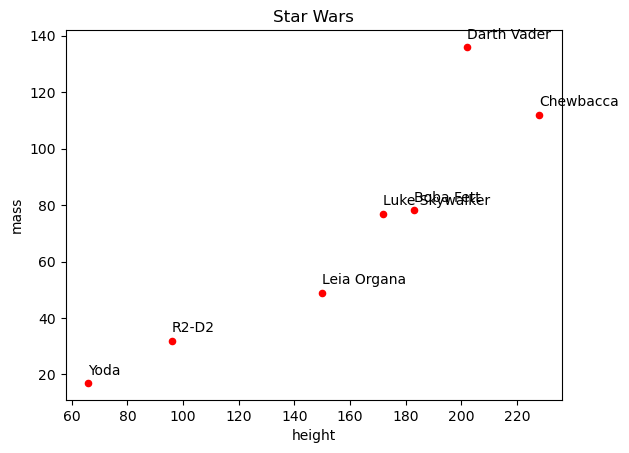

In [151]:
ax = starwars.plot.scatter(x = "height", y= "mass", color = "red", title = "Star Wars")

def add_name(row):
    ax.text(x= row["height"], y= row["mass"]+3, s= row["name"])

starwars.apply(add_name,axis=1)
plt.show()

#### Sortieren

In [152]:
starwars.sort_values(by = "height")
starwars.sort_values(by = "height", ascending= False)
starwars.sort_values(by = ["jedi", "height"], ascending= [True, False])


,name,height,mass,sex,eye_color,homeworld,jedi,BMI
4,Chewbacca,228,112.0,male,blue,Kashyyyk,False,21.545091
6,Boba Fett,183,78.2,male,brown,Kamino,False,23.350951
1,R2-D2,96,32.0,none,red,Naboo,False,34.722222
2,Darth Vader,202,136.0,male,yellow,Tatooine,True,33.330066
0,Luke Skywalker,172,77.0,male,blue,Tatooine,True,26.027582
3,Leia Organa,150,49.0,female,brown,Alderaan,True,21.777778
5,Yoda,66,17.0,male,brown,NaN,True,39.026630


Die Sortierung hat natürlich Konsequenzen für den Index. 
Möchte man diesen wieder korrigieren, so kann man entweder den Index reseten oder ihn direkt bei der Sortierung ignorieren lassen. 

In [153]:
starwars.sort_values("height").reset_index(drop = True) # früher war dies gängig
starwars.sort_values("height", ignore_index= True)

,name,height,mass,sex,eye_color,homeworld,jedi,BMI
0,Yoda,66,17.0,male,brown,NaN,True,39.026630
1,R2-D2,96,32.0,none,red,Naboo,False,34.722222
2,Leia Organa,150,49.0,female,brown,Alderaan,True,21.777778
3,Luke Skywalker,172,77.0,male,blue,Tatooine,True,26.027582
4,Boba Fett,183,78.2,male,brown,Kamino,False,23.350951
5,Darth Vader,202,136.0,male,yellow,Tatooine,True,33.330066
6,Chewbacca,228,112.0,male,blue,Kashyyyk,False,21.545091


#### Aggregation von Daten

Typische Aggregationsfunktionen wie z.B. mean(), sum(), max(), quantile() ... können direkt als Methode von `Series` aufgerufen werden.

In [154]:
starwars["mass"].mean()
starwars[["height", "mass"]].max()

height    228.0
mass      136.0
dtype: float64

Sehr oft möchte man derartige Aggregationen gruppenweise, d.h. für jede Ausprägung eines Merkmals, durchführen. Dies ist bekannt als **Split-Apply-Combine**: Die Gesamttabelle wird gemäß der Ausprägungen eines Merkmals in Einzeltabellen geteilt, für jede solche Tabelle berechnet man die Aggregationsfunktion und anschließend werden diese Werte in einer kleineren Tabelle gesammelt.

In [155]:
starwars[["jedi", "mass"]].groupby("jedi").mean() # eine spezielle Spalte
starwars.groupby("jedi")["mass"].mean() # gleichwertig zu erster Zeile
#starwars.groupby("jedi").mean(numeric_only = True) # für alle! numerischen Spalten

jedi
 False    74.066667
 True     69.750000
Name: mass, dtype: float64

Soeben haben wir direkt nach `.groupby()` eine eckige Klammer mit Spaltennamen genutzt. Dies wird oft gemacht und schränkt die Einzeltabellen auf die genannten Spalten ein. Die Aggregationsfunktion wirkt dann nur noch auf diese Spalten.

Man kann auch nach mehreren Merkmalen gruppieren. Das resultierende Objekt hat dann einen MultiIndex.

In [156]:
starwars.groupby(["jedi", "sex"])["mass"].mean()
starwars.groupby(["jedi", "sex"]).mean(numeric_only = True)

height       mass        BMI
jedi   sex                                     
 False male    205.500000  95.100000  22.448021
       none     96.000000  32.000000  34.722222
 True  female  150.000000  49.000000  21.777778
       male    146.666667  76.666667  32.794759

Sehr oft möchte man für jede Ausprägung eines Merkmals auszählen wie oft es vorkommt. Dies liefert die Grundlage für Balkendiagramme.
(Achtung: Standardmäßig bilden NA-Werte keine eigene Gruppe und werden nicht aufgeführt. Dies ist im Rahmen der Datenaufbereitung allerdings oft relevant. Hierfür kann man in `.groupby()` oder in `.value_counts()` die Option `dropna=False` setzen.)
Da das resultierende Objekt kein DataFrame ist, eignet sich ein `.reset_index()` um den Index zu einer expliziten Spalte zu machen und z.B. Sortierschritte anzuschließen.

In [157]:
starwars.groupby("sex").size().reset_index()
#starwars["sex"].value_counts()

,sex,0
0,female,1
1,male,5
2,none,1


Es gibt sowohl `.count()` als auch `.size()`. Diese sind sehr ähnlich. Während `.size()` die Zeilenanzahl zurückgibt, liefert `.count()` die Anzahl an Nicht-NA-Werten. Die eine Funktion zählt also NA-Werte mit, die andere hingegen nicht.

#### Datenschubsen für Fortgeschrittene: Long-Format und Wide-Format

<!--- Datenquelle:
- Destatis, Tabelle 12411-0015: Bevölkerung: Kreise, Stichtag (Auswahl: alle Stichtage). (Download Flat-File!)
- Destatis, Tabelle 12411-0018: Bevölkerung: Kreise, Stichtag, Geschlecht, Altersgruppen (Auswahl: alle Stichtage aber nur die 3 Kreise Aschaffenburg, Würzburg und Schweinfurt). (Download Flat-File!) -->

Es gibt verschiedene Möglichkeiten ein und die selben Daten tabellarisch darzustellen.
Je nach Anwendungsfall ist es nötig zwischen diesen Formen zu wechseln. Dies ist manchmal als "pivotieren" bekannt.
Am besten sieht man es an einem Beispiel. 

<!--- Die nachfolgende Tabelle (adaptiert nach Destatis Tabelle 12411-0016) stellt die Bevölkerungsentwicklung der drei Städte Aschaffenburg, Schweinfurt und Würzburg dar.-->

Die nachfolgende Tabelle enthält die Entwicklung der Studierendenzahlen für die TH Aschaffenburg

In [158]:
th = pd.read_csv("ressources/TH-Aschaffenburg.csv")
th.head()

,Jahr,Fach,Anfänger,Studierende
0,WS 02/03,BW,112.0,430.0
1,WS 02/03,BWR,57.0,230.0
2,WS 02/03,EIT,50.0,178.0
3,WS 02/03,M,44.0,44.0
4,WS 02/03,WI,69.0,183.0


<!--- Zur Einfachheit vernachlässigen wir zunächst die Geschlechtsunterscheidung und beschränken uns auf die Gesamtzahlen.
Die Tabelle ist im Long-Format und enthält für jede Kombination aus Ort und Zeit eine Zeile mit der Bevölkerungszahl.
Dies hat den Vorteil, dass problemlos weitere Orte und Zeiten ergänzt werden können ohne die Struktur der Tabelle ändern zu müssen.-->

Zur Einfachheit vernachlässigen wir zunächst die Gesamtstudierendenzahlen und beschränken uns nur auf die Studiengänge *BW* (Betriebswirtschaft), *SD* (Software Design) und *EIT* (Elektro- und Informationstechnik) seit dem Wintersemester 2018.

In [159]:
th_small = th[th["Fach"].isin(["BW", "SD", "EIT"])  & th["Jahr"].isin(["WS 18/19", "WS 19/20", "WS 20/21"])].drop(columns = "Studierende").reset_index(drop = True)
th_small

,Jahr,Fach,Anfänger
0,WS 18/19,BW,131.0
1,WS 18/19,EIT,69.0
2,WS 19/20,BW,129.0
3,WS 19/20,EIT,51.0
4,WS 20/21,BW,157.0
5,WS 20/21,EIT,29.0
6,WS 20/21,SD,55.0


Die obige Tabelle beinhaltet für jede Kombination von Studienjahr und Fach eine Zeile. 
Dies nennt man **Long-Format**.
Insbesondere für Zeitreihen ist es jedoch oft übersichtlicher die Daten anders anzuordnen.
Hier wollen wir die Anfängerzahlen jedes Faches in einer separaten Spalte darstellen.
Dies ist dann das **Wide-Format**.

Mit dem Befehl `pivot()` kann man die Felder geeignet "rotieren".
Hierbei muss man angeben welche Spalten als Index erhalten bleiben sollen, welche Spalte die neuen Spaltennamen enthält und welches die eigentlichen Werte sind.
Das Wide-Format mag übersichtlicher erscheinen, hat jedoch den Nachteil, dass man das Tabellenschema ändern muss wenn neue Studiengänge hinzukommen.

In [160]:
th_small_wide = th_small.pivot(index="Jahr", columns="Fach", values = "Anfänger")
th_small_wide

Fach,BW,EIT,SD
Jahr,,,
WS 18/19,131.0,69.0,NaN
WS 19/20,129.0,51.0,NaN
WS 20/21,157.0,29.0,55.0


Natürlich kann man auch vom Wide-Format zum Long-Format konvertieren.
Dies funktionert mit `melt()`.
(Zunächst machen wir jedoch mit `reset_index()` den Index zur einer regulären Spalte.)
Im Argument `id_vars` listet man alle Spalten, die konstant gehalten werden sollen - alle anderen Spalten werden zu zwei neuen Spalten "pivotiert", indem jede Kombination aus Spaltenname und jeweilem Eintrag eine neue Zeile bilden. 

In [161]:
#gesamtbevoelkerung_wide.reset_index().melt(id_vars = "Zeit")
th_small_wide.reset_index().melt(id_vars = "Jahr")

,Jahr,Fach,value
0,WS 18/19,BW,131.0
1,WS 19/20,BW,129.0
2,WS 20/21,BW,157.0
3,WS 18/19,EIT,69.0
4,WS 19/20,EIT,51.0
5,WS 20/21,EIT,29.0
6,WS 18/19,SD,NaN
7,WS 19/20,SD,NaN
8,WS 20/21,SD,55.0


Soeben hatten wir den Datensatz noch auf die Anfängerzahlen eingeschränkt und die Spalte *Studierende* entfernt.
So haben wir `pivot()` nur die Spalte *Anfänger* pivotieren lassen.

Belässt man hingegen die Studienrendenzahlen im Datensatz, so können wir auch diese mitpivotieren.
Hierbei entsteht für die Spalten ein **MultiIndex**.

In [162]:
th_small = th[th["Fach"].isin(["BW", "SD", "EIT"])  & th["Jahr"].isin(["WS 18/19", "WS 19/20", "WS 20/21"])].reset_index(drop = True)
th_small

,Jahr,Fach,Anfänger,Studierende
0,WS 18/19,BW,131.0,582.0
1,WS 18/19,EIT,69.0,211.0
2,WS 19/20,BW,129.0,557.0
3,WS 19/20,EIT,51.0,186.0
4,WS 20/21,BW,157.0,559.0
5,WS 20/21,EIT,29.0,140.0
6,WS 20/21,SD,55.0,55.0


In [163]:
th_small_wide = th_small.pivot(index= ["Jahr"], columns= "Fach", values= ["Anfänger", "Studierende"])

In [164]:
th_small_wide.columns
th_small_wide["Anfänger"]
th_small_wide[("Anfänger", "EIT")]

Jahr
WS 18/19    69.0
WS 19/20    51.0
WS 20/21    29.0
Name: (Anfänger, EIT), dtype: float64

Eng verwandt mit `pivot()` und `melt()` sind die Funktionen `stack()` und `unstack()`.
Sie sind vor allem im Zusammenspiel mit Indexen und MultiIndexen sinnvoll.

- `stack()` pivotiert ("stapelt") alle Spaltenlabel (außer dem Index) und liefert eine Series (oder einen DataFrame) mit einem zusätzlichen inneren Indexlevel.
- `unstack()` pivotiert das innerste Indexlevel zu Spaltenlabeln und erzeugt so einen DataFrame.

Beschränken wir uns zur Übersichtlichkeit auf die obigen Anfängerzahlen.

In [165]:
beginners = th_small_wide["Anfänger"]
beginners

Fach,BW,EIT,SD
Jahr,,,
WS 18/19,131.0,69.0,NaN
WS 19/20,129.0,51.0,NaN
WS 20/21,157.0,29.0,55.0


`stack()` rotiert alle Spaltennamen zu einem neuen inneren Indexlevel und liefert somit eine Series mit einem zweistufigen Multiindex.

In [166]:
beginners_stacked = beginners.stack()
beginners_stacked

Jahr      Fach
WS 18/19  BW      131.0
          EIT      69.0
WS 19/20  BW      129.0
          EIT      51.0
WS 20/21  BW      157.0
          EIT      29.0
          SD       55.0
dtype: float64

Mittels `unstack()` wird das innerste Level eines MultiIndex zu neuen Spaltennamen und wir erhalten wieder den ursprünglichen DataFrame.
(Möchte man anstatt des innersten Levels ein anderes Indexlevel pivotieren, so kann man sowohl `stack` als auch `unstack` ein Indexlevel angeben.)

In [167]:
beginners_stacked.unstack()

Fach,BW,EIT,SD
Jahr,,,
WS 18/19,131.0,69.0,NaN
WS 19/20,129.0,51.0,NaN
WS 20/21,157.0,29.0,55.0


Nebenbei: Anstatt `pivot` aufzurufen kann man auch mittels `set_index` einen MultiIndex erzeugen und im Anschluss `unstack` aufrufen.

#### Zusammenführen mehrerer Tabellen

Sehr oft möchte man mehrere Tabellen kombinieren um Informationen anzureichern.
Auch mit Pandas kann man mehrere DataFrames verjoinen, so wie man es von SQL kennt.

Die einfachste Variante um zwei DataFrames zu kombinieren ist das simple Untereinanderhängen.
Dies ergibt selbstverständlich nur dann Sinn, wenn die Spalten übereinstimmen (oder zumindest Teilmengen voneinander sind).
Betrachten wir hier beispielsweise die Daten zum Fach *MEDS* sowie zu *BW KMU*.
Mit `concat()` lassen sich die beiden Tabellen direkt hintereinanderhängen.

In [168]:
df_1 = th[th["Fach"] == "MEDS"]
df_2 = th[th["Fach"] == "BW KMU"]

pd.concat([df_1, df_2])

,Jahr,Fach,Anfänger,Studierende
186,WS 19/20,MEDS,48.0,48.0
207,WS 20/21,MEDS,31.0,56.0
139,WS 17/18,BW KMU,34.0,34.0
158,WS 18/19,BW KMU,34.0,59.0
177,WS 19/20,BW KMU,45.0,97.0
197,WS 20/21,BW KMU,22.0,89.0


Inhaltlich spannender ist das Verjoinen von Tabellen um zusätzliche Spalten zu erhalten.
In der bisherigen Tabelle sind z.B. nur die Studiengangskürzel enthalten und auch eine Zuordnung zu Fakultäten fehlt.
Diese Information liefert die folgende Tabelle

In [169]:
th_names = pd.read_csv("ressources/TH-Aschaffenburg_Faecher.csv")
th_names.head()

,Abkürzung,Langname,Fakultät
0,BW,Betriebswirtschaft,WR
1,BW KMU,Betriebswirtschaft für KMU,WR
2,BWR,Betriebswirtschaft und Recht,WR
3,DIM,Digitales Immobilienmanagement,WR
4,IIM,Internationales Immobilienmanagement,WR


Mittels `merge()` kann man in Pandas alle Arten von JOIN-Operationen durchführen, wie man sie aus SQL kennt.
Hier wollen wir die Tabelle *th_small* mit den jeweiligen Studiengangsinformationen anreichern.

In [170]:
th_small.merge(right = th_names, how = "left", left_on = "Fach", right_on = "Abkürzung")

,Jahr,Fach,Anfänger,Studierende,Abkürzung,Langname,Fakultät
0,WS 18/19,BW,131.0,582.0,BW,Betriebswirtschaft,WR
1,WS 18/19,EIT,69.0,211.0,EIT,Elektro- und Informationstechnik,IW
2,WS 19/20,BW,129.0,557.0,BW,Betriebswirtschaft,WR
3,WS 19/20,EIT,51.0,186.0,EIT,Elektro- und Informationstechnik,IW
4,WS 20/21,BW,157.0,559.0,BW,Betriebswirtschaft,WR
5,WS 20/21,EIT,29.0,140.0,EIT,Elektro- und Informationstechnik,IW
6,WS 20/21,SD,55.0,55.0,SD,Software Design,IW


Mit `merge()` lassen sich auch andere Joins durchführen, beispielsweise ein RIGHT JOIN (aber auch INNER JOIN oder OUTER JOIN).

In [171]:
th_small.merge(right = th_names, how = "right", left_on = "Fach", right_on = "Abkürzung")

,Jahr,Fach,Anfänger,Studierende,Abkürzung,Langname,Fakultät
0,WS 18/19,BW,131.0,582.0,BW,Betriebswirtschaft,WR
1,WS 19/20,BW,129.0,557.0,BW,Betriebswirtschaft,WR
2,WS 20/21,BW,157.0,559.0,BW,Betriebswirtschaft,WR
3,NaN,NaN,NaN,NaN,BW KMU,Betriebswirtschaft für KMU,WR
4,NaN,NaN,NaN,NaN,BWR,Betriebswirtschaft und Recht,WR
5,NaN,NaN,NaN,NaN,DIM,Digitales Immobilienmanagement,WR
6,NaN,NaN,NaN,NaN,IIM,Internationales Immobilienmanagement,WR
7,NaN,NaN,NaN,NaN,WiPsy,Wirtschaftspsychologie,WR
8,NaN,NaN,NaN,NaN,Master ImmoM,Immobilienmanagement (Master),WR
9,NaN,NaN,NaN,NaN,Master IntM,International Management (Master),WR
